# Missing Data Repairing with Pandas

Missing Data is a common problem we face while dealing with real life probelsm. this may occured due to inefficiency of devices recording data, human error, or may be storage issues. Here I will demonstrate how pandas can be used to deal wit missing data.

- Data used here is a dummy_sample_data. Which is synthetic data to demonstrate capabilities of pandas while dealing with missing values.

In [2]:
import missingno as msno
import pandas as pd

In [3]:
df = pd.read_csv('../Data/inputs/sample_missing_data.csv')

In [4]:
df

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
0,100.0,NaN,48.0,15.2,15.2
1,100.5,NaN,15.0,26.1,26.1
2,101.0,145.0,51.0,16.2,16.2
3,101.5,96.0,46.0,18.9,18.9
4,102.0,137.0,NaN,17.9,17.9
5,102.5,51.0,53.0,24.3,24.3
6,103.0,2.0,35.0,22.4,22.4
7,103.5,15.0,17.0,17.4,17.4
8,104.0,104.0,NaN,19.8,NaN
9,104.5,10.0,36.0,24.4,NaN


In [5]:
df.describe()

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
count,20.00000,17.000000,15.000000,20.000000,15.000000
mean,104.75000,68.705882,47.400000,20.720000,20.753333
std,2.95804,51.247884,33.221766,3.951762,4.210169
min,100.00000,2.000000,3.000000,15.200000,15.200000
25%,102.37500,19.000000,21.500000,17.475000,17.450000
50%,104.75000,55.000000,46.000000,21.700000,22.300000
75%,107.12500,108.000000,70.500000,22.650000,22.700000
max,109.50000,145.000000,97.000000,29.700000,29.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH     20 non-null     float64
 1   CURVE A   17 non-null     float64
 2   CURVE B   15 non-null     float64
 3   CURVE C   20 non-null     float64
 4   CURVE C1  15 non-null     float64
dtypes: float64(5)
memory usage: 928.0 bytes


<AxesSubplot:>

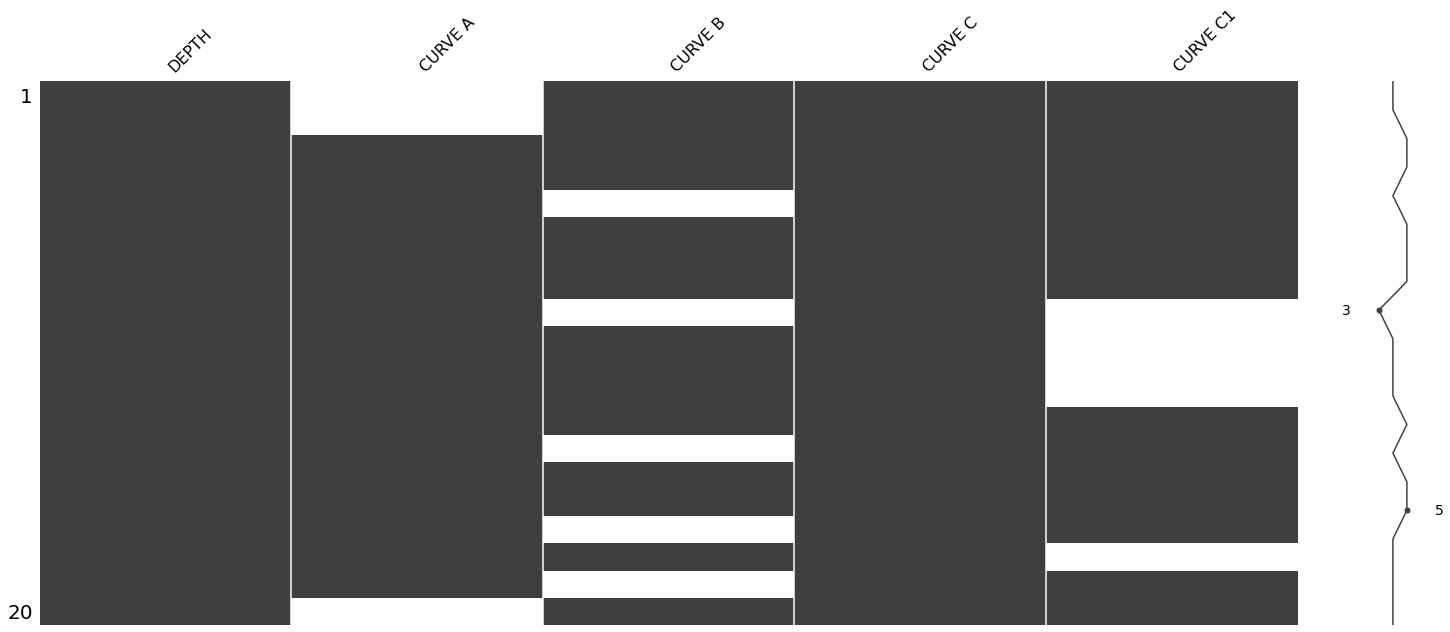

In [7]:
msno.matrix(df)

In [8]:
df.isnull().sum()

DEPTH       0
CURVE A     3
CURVE B     5
CURVE C     0
CURVE C1    5
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
0,100.0,NaN,48.0,15.2,15.2
1,100.5,NaN,15.0,26.1,26.1
4,102.0,137.0,NaN,17.9,17.9
8,104.0,104.0,NaN,19.8,NaN
9,104.5,10.0,36.0,24.4,NaN
10,105.0,32.0,3.0,15.2,NaN
11,105.5,117.0,26.0,21.1,NaN
13,106.5,6.0,NaN,22.8,22.8
16,108.0,95.0,NaN,29.7,29.7
17,108.5,37.0,97.0,22.6,NaN


## Dropping Missing Data

In [12]:
# drop rows containing Nan
df.dropna()

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
2,101.0,145.0,51.0,16.2,16.2
3,101.5,96.0,46.0,18.9,18.9
5,102.5,51.0,53.0,24.3,24.3
6,103.0,2.0,35.0,22.4,22.4
7,103.5,15.0,17.0,17.4,17.4
12,106.0,19.0,97.0,22.6,22.6
14,107.0,55.0,88.0,22.4,22.4
15,107.5,139.0,4.0,15.6,15.6


In [13]:
# drop columns
df.dropna(axis=1)

,DEPTH,CURVE C
0,100.0,15.2
1,100.5,26.1
2,101.0,16.2
3,101.5,18.9
4,102.0,17.9
5,102.5,24.3
6,103.0,22.4
7,103.5,17.4
8,104.0,19.8
9,104.5,24.4


# Filling Data


In [14]:
# filling with a fixed value
df.fillna(1000)

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
0,100.0,1000.0,48.0,15.2,15.2
1,100.5,1000.0,15.0,26.1,26.1
2,101.0,145.0,51.0,16.2,16.2
3,101.5,96.0,46.0,18.9,18.9
4,102.0,137.0,1000.0,17.9,17.9
5,102.5,51.0,53.0,24.3,24.3
6,103.0,2.0,35.0,22.4,22.4
7,103.5,15.0,17.0,17.4,17.4
8,104.0,104.0,1000.0,19.8,1000.0
9,104.5,10.0,36.0,24.4,1000.0


In [15]:
# Fill Forward
df.fillna(method='ffill')

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
0,100.0,NaN,48.0,15.2,15.2
1,100.5,NaN,15.0,26.1,26.1
2,101.0,145.0,51.0,16.2,16.2
3,101.5,96.0,46.0,18.9,18.9
4,102.0,137.0,46.0,17.9,17.9
5,102.5,51.0,53.0,24.3,24.3
6,103.0,2.0,35.0,22.4,22.4
7,103.5,15.0,17.0,17.4,17.4
8,104.0,104.0,17.0,19.8,17.4
9,104.5,10.0,36.0,24.4,17.4


In [16]:
# Filling backward
df.fillna(method='bfill')

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
0,100.0,145.0,48.0,15.2,15.2
1,100.5,145.0,15.0,26.1,26.1
2,101.0,145.0,51.0,16.2,16.2
3,101.5,96.0,46.0,18.9,18.9
4,102.0,137.0,53.0,17.9,17.9
5,102.5,51.0,53.0,24.3,24.3
6,103.0,2.0,35.0,22.4,22.4
7,103.5,15.0,17.0,17.4,17.4
8,104.0,104.0,36.0,19.8,22.6
9,104.5,10.0,36.0,24.4,22.6


In [17]:
# Interpolate Values
df.interpolate(method='linear')

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
0,100.0,NaN,48.0,15.2,15.20
1,100.5,NaN,15.0,26.1,26.10
2,101.0,145.0,51.0,16.2,16.20
3,101.5,96.0,46.0,18.9,18.90
4,102.0,137.0,49.5,17.9,17.90
5,102.5,51.0,53.0,24.3,24.30
6,103.0,2.0,35.0,22.4,22.40
7,103.5,15.0,17.0,17.4,17.40
8,104.0,104.0,26.5,19.8,18.44
9,104.5,10.0,36.0,24.4,19.48


In [18]:
# fill with mean
df.fillna(value=df.mean())

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
0,100.0,68.705882,48.0,15.2,15.200000
1,100.5,68.705882,15.0,26.1,26.100000
2,101.0,145.000000,51.0,16.2,16.200000
3,101.5,96.000000,46.0,18.9,18.900000
4,102.0,137.000000,47.4,17.9,17.900000
5,102.5,51.000000,53.0,24.3,24.300000
6,103.0,2.000000,35.0,22.4,22.400000
7,103.5,15.000000,17.0,17.4,17.400000
8,104.0,104.000000,47.4,19.8,20.753333
9,104.5,10.000000,36.0,24.4,20.753333


In [19]:
df.describe()

,DEPTH,CURVE A,CURVE B,CURVE C,CURVE C1
count,20.00000,17.000000,15.000000,20.000000,15.000000
mean,104.75000,68.705882,47.400000,20.720000,20.753333
std,2.95804,51.247884,33.221766,3.951762,4.210169
min,100.00000,2.000000,3.000000,15.200000,15.200000
25%,102.37500,19.000000,21.500000,17.475000,17.450000
50%,104.75000,55.000000,46.000000,21.700000,22.300000
75%,107.12500,108.000000,70.500000,22.650000,22.700000
max,109.50000,145.000000,97.000000,29.700000,29.700000


### Summary
We just sasw simple methods to deal with filling missing data. 

Author:\
Dilshad raza\
07/20/2022